In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import mudata as md
import os
import sys
import pooch
import scanpy as sc
import leidenalg
import scanpy.external as sce
import matplotlib.pyplot as plt
import muon as mu
from muon import prot as pt

/data/msun/miniconda3/envs/CITE/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('/data/msun/projects/Stephen/PDAC_scRNA/')
from core_functions.difference import *

In [3]:
# Filter out warnings to minimize clutter
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [4]:
sc.settings.n_jobs = -1

# DEG of all cell types

In [5]:
adata = sc.read_h5ad('/data/msun/projects/Stephen/PDAC_scRNA/01_process_annnotate/annotated_rna_nospleen.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 6547 × 55487
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltype_V1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'condition', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DEG_leiden_res0_25', 'celltype_V1_colors', 'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_fine_colors', 'condition_colors', 'dendrogram_leiden_res0_25', 'hvg', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_2

In [7]:
findDEG(adata, cluster_key = "celltype_V1", condition_key = "condition")

Processing comparison: Fish vs LFD
  Processing cluster: Myeloid_cells
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Myeloid_cells.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Myeloid_cells.pdf
  Processing cluster: Tregs
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Tregs.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Tregs.pdf
  Processing cluster: Neutrophils
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Neutrophils.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Neutrophils.pdf
  Processing cluster: Innate_lymphoid_cells
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Innate_lymphoid_cells.csv
Volcano plot saved to /data/msun/projects/Stephen/PD

## summarize change across cell types 

Processing cluster: Myeloid_cells
Processing cluster: Tregs
Processing cluster: Neutrophils
Processing cluster: Innate_lymphoid_cells
Processing cluster: CD4T_cells
Processing cluster: NK_cells
Processing cluster: B_cells
Processing cluster: CD8T_cells
Processing cluster: DC
Processing cluster: Tumor_cells
Processing cluster: Mast_cells
Processing cluster: pDC


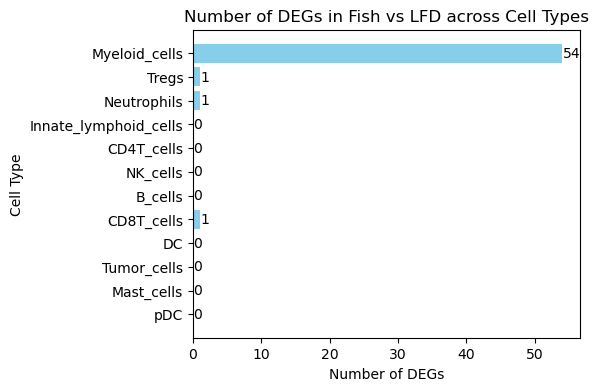

,Cell Type,DEG Count
0,Myeloid_cells,54
1,Tregs,1
2,Neutrophils,1
3,Innate_lymphoid_cells,0
4,CD4T_cells,0
5,NK_cells,0
6,B_cells,0
7,CD8T_cells,1
8,DC,0
9,Tumor_cells,0


In [8]:
compare_deg_counts(adata, cluster_key = "celltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "LFD")

Processing cluster: Myeloid_cells
Processing cluster: Tregs
Processing cluster: Neutrophils
Processing cluster: Innate_lymphoid_cells
Processing cluster: CD4T_cells
Processing cluster: NK_cells
Processing cluster: B_cells
Processing cluster: CD8T_cells
Processing cluster: DC
Processing cluster: Tumor_cells
Processing cluster: Mast_cells
Processing cluster: pDC


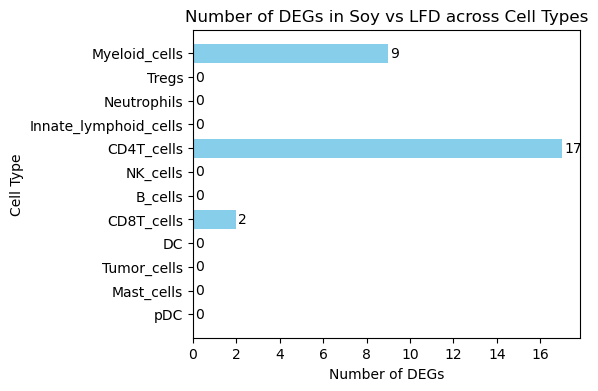

,Cell Type,DEG Count
0,Myeloid_cells,9
1,Tregs,0
2,Neutrophils,0
3,Innate_lymphoid_cells,0
4,CD4T_cells,17
5,NK_cells,0
6,B_cells,0
7,CD8T_cells,2
8,DC,0
9,Tumor_cells,0


In [87]:
compare_deg_counts(adata, cluster_key = "celltype_V1", condition_key = "condition", cond1 = "Soy", cond2 = "LFD")

Processing cluster: Myeloid_cells
Processing cluster: Tregs
Processing cluster: Neutrophils
Processing cluster: Innate_lymphoid_cells
Processing cluster: CD4T_cells
Processing cluster: NK_cells
Processing cluster: B_cells
Processing cluster: CD8T_cells
Processing cluster: DC
Processing cluster: Tumor_cells
Processing cluster: Mast_cells
Processing cluster: pDC


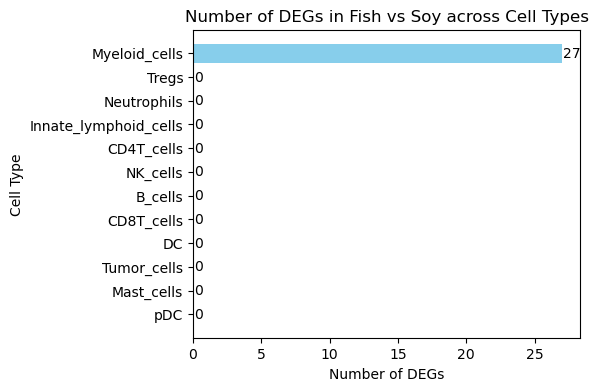

,Cell Type,DEG Count
0,Myeloid_cells,27
1,Tregs,0
2,Neutrophils,0
3,Innate_lymphoid_cells,0
4,CD4T_cells,0
5,NK_cells,0
6,B_cells,0
7,CD8T_cells,0
8,DC,0
9,Tumor_cells,0


In [10]:
compare_deg_counts(adata, cluster_key = "celltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "Soy")

# DEG of CD8 t cells 

In [88]:
tadata = sc.read_h5ad('/data/msun/projects/Stephen/PDAC_scRNA/01_process_annnotate/annotated_rna_nospleen_cd8t.h5ad')

In [89]:
tadata

AnnData object with n_obs × n_vars = 750 × 55487
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltype_V1', 't_leiden_res0_25', 't_leiden_res0_5', 't_leiden_res0_75', 't_leiden_res1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'Tcelltype_V1', 'condition', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DEG_leiden_res0_25', 'DEG_leiden_res0_5', 'DEG_leiden_res0_75', 'Tcelltype_V1_colors', 'celltype_V1_colors', 'celltypist_cell_label_c

In [90]:
findDEG(tadata, cluster_key = "Tcelltype_V1", condition_key = "condition")

Processing comparison: Fish vs LFD
  Processing cluster: Exh_prog
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Exh_prog.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Exh_prog.pdf
  Processing cluster: Exh_Int
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Exh_Int.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Exh_Int.pdf
  Processing cluster: Proliferating_T
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Proliferating_T.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Proliferating_T.pdf
  Processing cluster: Eff_like
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Eff_like.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/

Processing cluster: Exh_prog
Processing cluster: Exh_Int
Processing cluster: Proliferating_T
Processing cluster: Eff_like
Processing cluster: Exh_term


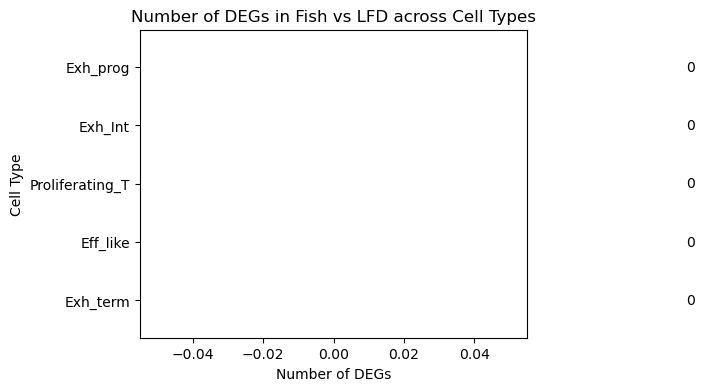

,Cell Type,DEG Count
0,Exh_prog,0
1,Exh_Int,0
2,Proliferating_T,0
3,Eff_like,0
4,Exh_term,0


In [91]:
compare_deg_counts(tadata, cluster_key = "Tcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "LFD")

Processing cluster: Exh_prog
Processing cluster: Exh_Int
Processing cluster: Proliferating_T
Processing cluster: Eff_like
Processing cluster: Exh_term


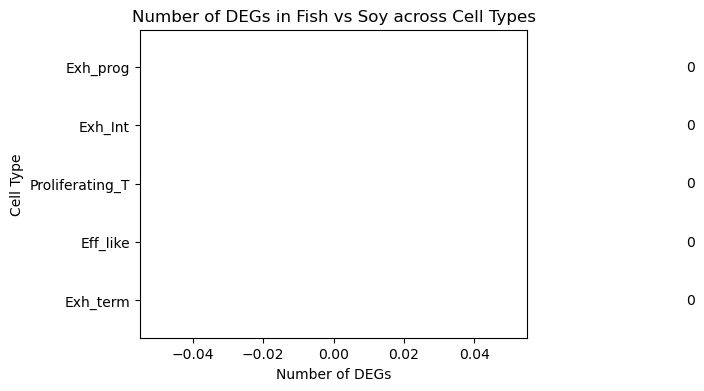

,Cell Type,DEG Count
0,Exh_prog,0
1,Exh_Int,0
2,Proliferating_T,0
3,Eff_like,0
4,Exh_term,0


In [92]:
compare_deg_counts(tadata, cluster_key = "Tcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "Soy")

Processing cluster: Exh_prog
Processing cluster: Exh_Int
Processing cluster: Proliferating_T
Processing cluster: Eff_like
Processing cluster: Exh_term


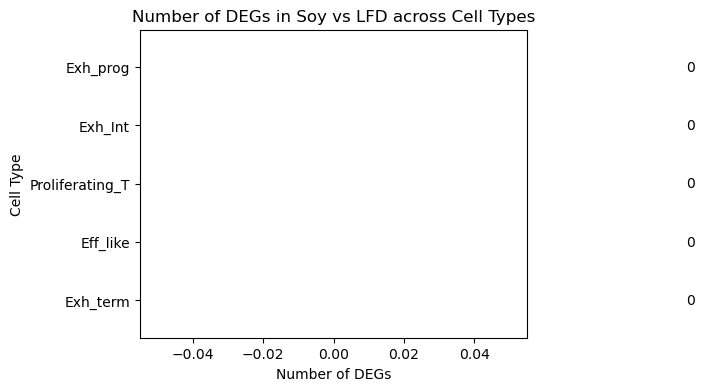

,Cell Type,DEG Count
0,Exh_prog,0
1,Exh_Int,0
2,Proliferating_T,0
3,Eff_like,0
4,Exh_term,0


In [93]:
compare_deg_counts(tadata, cluster_key = "Tcelltype_V1", condition_key = "condition", cond1 = "Soy", cond2 = "LFD")

# DEG of TAM 

In [44]:
tamadata = sc.read_h5ad('/data/msun/projects/Stephen/PDAC_scRNA/01_process_annnotate/annotated_rna_nospleen_tam.h5ad')

In [45]:
tamadata

AnnData object with n_obs × n_vars = 1716 × 55487
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltype_V1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'tam_leiden_res0_25', 'tam_leiden_res0_5', 'tam_leiden_res0_75', 'tam_leiden_res1', 'TAMcelltype_V1', 'TAMcelltype_V2', 'condition', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DEG_leiden_res0_25', 'DEG_leiden_res0_75', 'TAMcelltype_V1_colors', 'TAMcelltype_V2_colors', 'celltypist

## celltype_V1

In [46]:
findDEG(tamadata, cluster_key = "TAMcelltype_V1", condition_key = "condition")

Processing comparison: Fish vs LFD
  Processing cluster: Arg1_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Arg1_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Arg1_TAM.pdf
  Processing cluster: AP_Monocyte
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/AP_Monocyte.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/AP_Monocyte.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs LFD due to error: Could not calculate statistics for groups Fish since they only contain one sample.


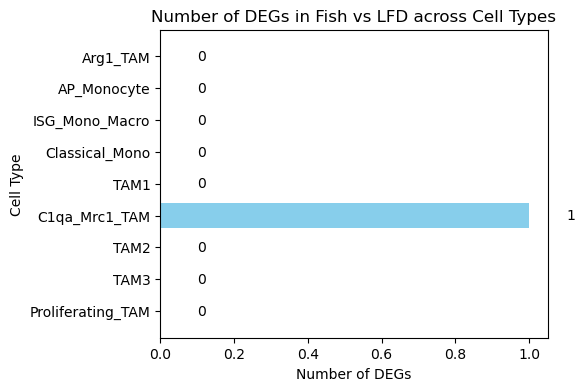

,Cell Type,DEG Count
0,Arg1_TAM,0
1,AP_Monocyte,0
2,ISG_Mono_Macro,0
3,Classical_Mono,0
4,TAM1,0
5,C1qa_Mrc1_TAM,1
6,TAM2,0
7,TAM3,0
8,Proliferating_TAM,0


In [47]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "LFD",pval_threshold=0.1, logfc_threshold=0)

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish since they only contain one sample.


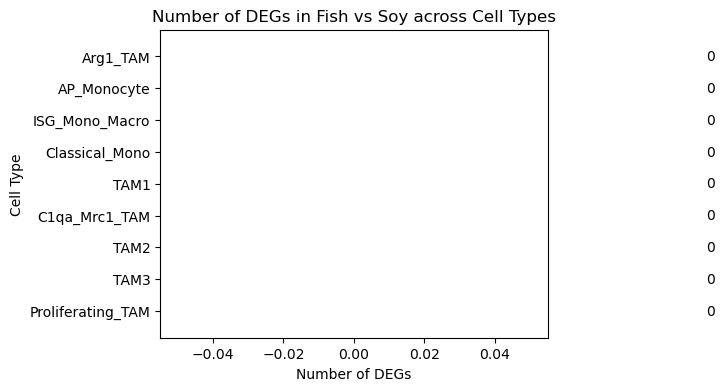

,Cell Type,DEG Count
0,Arg1_TAM,0
1,AP_Monocyte,0
2,ISG_Mono_Macro,0
3,Classical_Mono,0
4,TAM1,0
5,C1qa_Mrc1_TAM,0
6,TAM2,0
7,TAM3,0
8,Proliferating_TAM,0


In [48]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "Soy",pval_threshold=0.1, logfc_threshold=0)

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4


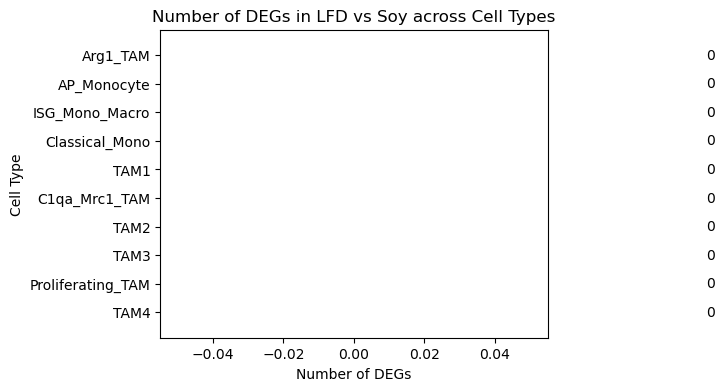

,Cell Type,DEG Count
0,Arg1_TAM,0
1,AP_Monocyte,0
2,ISG_Mono_Macro,0
3,Classical_Mono,0
4,TAM1,0
5,C1qa_Mrc1_TAM,0
6,TAM2,0
7,TAM3,0
8,Proliferating_TAM,0
9,TAM4,0


In [49]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "LFD", cond2 = "Soy",pval_threshold=0.1, logfc_threshold=0)

## celltype_V2

In [67]:
findDEG(tamadata, cluster_key = "TAMcelltype_V2", condition_key = "condition")

Processing comparison: Fish vs LFD
  Processing cluster: tissue_resident_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/tissue_resident_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/tissue_resident_TAM.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Classical_Mono.pdf
  Processing cluster: TAM1
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/rna_Fish_vs_LFD/TAM1.csv
Volcano plot saved to /data/msun

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs LFD due to error: Could not calculate statistics for groups Fish since they only contain one sample.


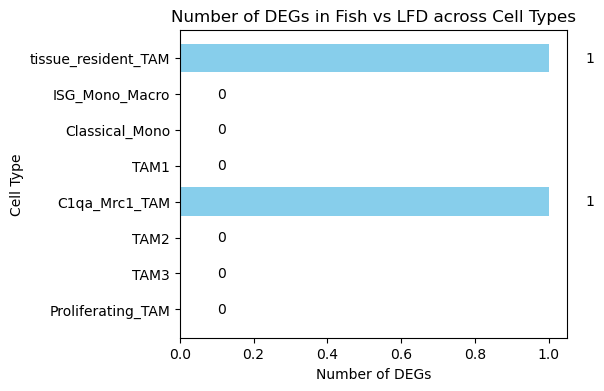

,Cell Type,DEG Count
0,tissue_resident_TAM,1
1,ISG_Mono_Macro,0
2,Classical_Mono,0
3,TAM1,0
4,C1qa_Mrc1_TAM,1
5,TAM2,0
6,TAM3,0
7,Proliferating_TAM,0


In [68]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "Fish", cond2 = "LFD",pval_threshold=0.1, logfc_threshold=0)

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish since they only contain one sample.


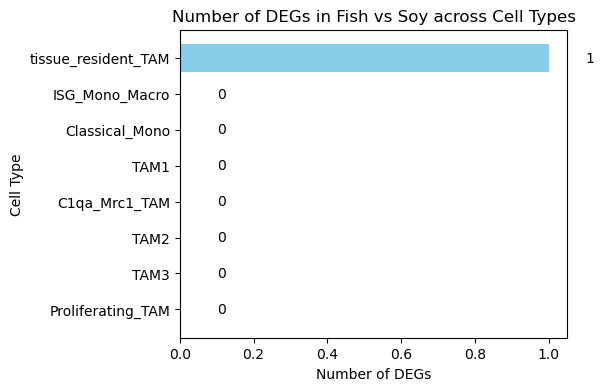

,Cell Type,DEG Count
0,tissue_resident_TAM,1
1,ISG_Mono_Macro,0
2,Classical_Mono,0
3,TAM1,0
4,C1qa_Mrc1_TAM,0
5,TAM2,0
6,TAM3,0
7,Proliferating_TAM,0


In [69]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "Fish", cond2 = "Soy",pval_threshold=0.1, logfc_threshold=0)

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4


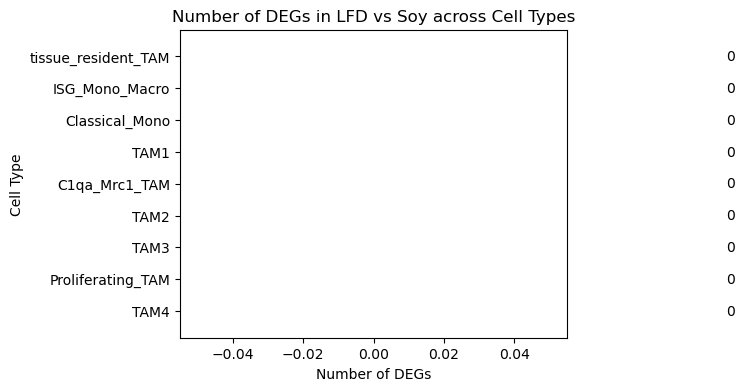

,Cell Type,DEG Count
0,tissue_resident_TAM,0
1,ISG_Mono_Macro,0
2,Classical_Mono,0
3,TAM1,0
4,C1qa_Mrc1_TAM,0
5,TAM2,0
6,TAM3,0
7,Proliferating_TAM,0
8,TAM4,0


In [70]:
compare_deg_counts(tamadata, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "LFD", cond2 = "Soy",pval_threshold=0.1, logfc_threshold=0)

# DEProtein of TAM 

In [71]:
tam_mdata = mu.read('/data/msun/projects/Stephen/PDAC_scRNA/01_process_annnotate/annotated_citeseq_nospleen_tam.h5mu')

In [72]:
tam_mdata

MuData object with n_obs × n_vars = 1716 × 55632
  obs:	'HT1', 'HT2', 'HT3', 'HT4', 'HT5', 'HT6', 'HT7', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'sample', 'condition', 'leiden'
  var:	'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
  obsm:	'X_mofa', 'X_umap', 'X_umap_mofa'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    rna:	1716 x 55487
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltype_V1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'tam_leiden_res0_25', 'tam_leiden_res0_5', 'tam_leiden_res0_75', 'tam_leiden_res1', 'TAMcelltype_V1', 'TAMcelltype_V2'
      var:	'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'DEG_leiden_res0_25', 'DEG_leiden_res0_75', 'TAMcelltype_V1_colors', 'TAMcelltype_V2_colors', 'celltypist_cell_label_fine_colors', 'condition_colors', 'dendrogram_leiden_res0_25', 'dendrogram_tam_leiden_res0_75', 'hvg', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res0_75', 'leiden_res0_75_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'tam_leiden_res0_25', 'tam_leiden_res0_25_colors', 'tam_leiden_res0_5', 'tam_leiden_res0_5_colors', 'tam_leiden_res0_75', 'tam_leiden_res0_75_colors', 'tam_leiden_res1', 'tam_leiden_res1_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'magiced', 'scaled'
      obsp:	'connectivities', 'distances'
    prot:	1716 x 145
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublets_markers'
      var:	'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
      uns:	'Classification_colors', 'doublets_markers_colors', 'leiden_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [73]:
tam_mdata.mod["prot"].obs["condition"] = tam_mdata.obs["condition"]
tam_mdata.mod["prot"].obs["sample"] = tam_mdata.obs["sample"]
tam_mdata.mod["prot"].obs["TAMcelltype_V1"] = tam_mdata.mod["rna"].obs["TAMcelltype_V1"]
tam_mdata.mod["prot"].obs["TAMcelltype_V2"] = tam_mdata.mod["rna"].obs["TAMcelltype_V2"]

In [74]:
prot = tam_mdata.mod["prot"]

In [75]:
prot

AnnData object with n_obs × n_vars = 1716 × 145
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublets_markers', 'condition', 'sample', 'TAMcelltype_V1', 'TAMcelltype_V2'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Classification_colors', 'doublets_markers_colors', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## celltype_V1

In [76]:
findDEG(prot, cluster_key = "TAMcelltype_V1", condition_key = "condition", layers = "prot")

Processing comparison: Fish vs LFD
  Processing cluster: Arg1_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/Arg1_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Arg1_TAM.pdf
  Processing cluster: AP_Monocyte


posx and posy should be finite values
posx and posy should be finite values


Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/AP_Monocyte.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/AP_Monocyte.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Classical_Mono.pdf
  Processing cluster: TAM1
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/TAM1.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/TAM1.pdf
  Processing 

posx and posy should be finite values
posx and posy should be finite values


Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/C1qa_Mrc1_TAM.pdf
  Processing cluster: TAM2
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/TAM2.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/TAM2.pdf
  Processing cluster: TAM3
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/TAM3.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/TAM3.pdf
  Processing cluster: Proliferating_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/Proliferating_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/Proliferating_TAM.pdf
  Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish si

posx and posy should be finite values
posx and posy should be finite values


Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/Arg1_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/Arg1_TAM.pdf
  Processing cluster: AP_Monocyte
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/AP_Monocyte.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/AP_Monocyte.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/Classical_Mono.pdf
  Proc

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs LFD due to error: Could not calculate statistics for groups Fish since they only contain one sample.


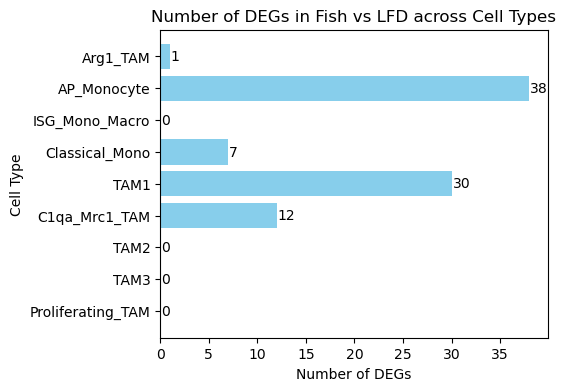

,Cell Type,DEG Count
0,Arg1_TAM,1
1,AP_Monocyte,38
2,ISG_Mono_Macro,0
3,Classical_Mono,7
4,TAM1,30
5,C1qa_Mrc1_TAM,12
6,TAM2,0
7,TAM3,0
8,Proliferating_TAM,0


In [80]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "LFD",pval_threshold=0.05, logfc_threshold=0, layers = "prot")

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish since they only contain one sample.


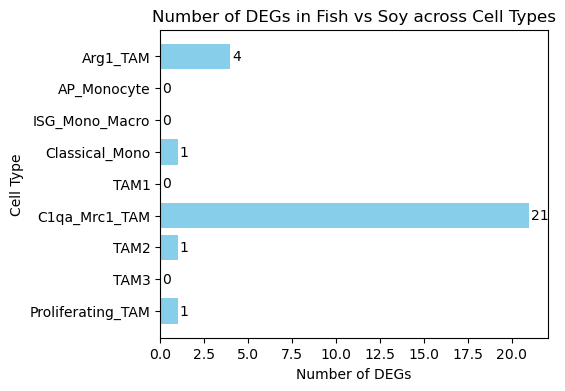

,Cell Type,DEG Count
0,Arg1_TAM,4
1,AP_Monocyte,0
2,ISG_Mono_Macro,0
3,Classical_Mono,1
4,TAM1,0
5,C1qa_Mrc1_TAM,21
6,TAM2,1
7,TAM3,0
8,Proliferating_TAM,1


In [81]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "Fish", cond2 = "Soy",pval_threshold=0.05, logfc_threshold=0, layers = "prot")

Processing cluster: Arg1_TAM
Processing cluster: AP_Monocyte
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4


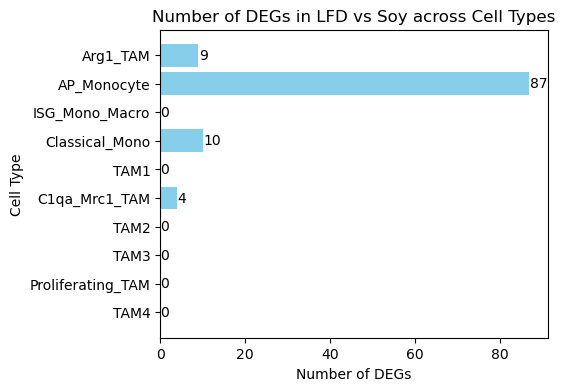

,Cell Type,DEG Count
0,Arg1_TAM,9
1,AP_Monocyte,87
2,ISG_Mono_Macro,0
3,Classical_Mono,10
4,TAM1,0
5,C1qa_Mrc1_TAM,4
6,TAM2,0
7,TAM3,0
8,Proliferating_TAM,0
9,TAM4,0


In [82]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V1", condition_key = "condition", cond1 = "LFD", cond2 = "Soy",pval_threshold=0.05, logfc_threshold=0, layers = "prot")

## celltype_V2

In [83]:
findDEG(prot, cluster_key = "TAMcelltype_V2", condition_key = "condition", layers = "prot")

posx and posy should be finite values
posx and posy should be finite values


Processing comparison: Fish vs LFD
  Processing cluster: tissue_resident_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/tissue_resident_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/tissue_resident_TAM.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_LFD/Classical_Mono.pdf
  Processing cluster: TAM1
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_LFD/TAM1.csv
Volcano plot saved to /data/

posx and posy should be finite values
posx and posy should be finite values


Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/C1qa_Mrc1_TAM.pdf
  Processing cluster: TAM2
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/TAM2.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/TAM2.pdf
  Processing cluster: TAM3
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/TAM3.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/TAM3.pdf
  Processing cluster: Proliferating_TAM
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_Fish_vs_Soy/Proliferating_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_Fish_vs_Soy/Proliferating_TAM.pdf
  Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish si

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/tissue_resident_TAM.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/tissue_resident_TAM.pdf
  Processing cluster: ISG_Mono_Macro
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/ISG_Mono_Macro.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/ISG_Mono_Macro.pdf
  Processing cluster: Classical_Mono
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/Classical_Mono.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/Classical_Mono.pdf
  Processing cluster: TAM1
Results saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/DEG/prot_LFD_vs_Soy/TAM1.csv
Volcano plot saved to /data/msun/projects/Stephen/PDAC_scRNA/02_difference/volcano/rna_LFD_vs_Soy/TAM1.pdf
  Pro

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs LFD due to error: Could not calculate statistics for groups Fish since they only contain one sample.


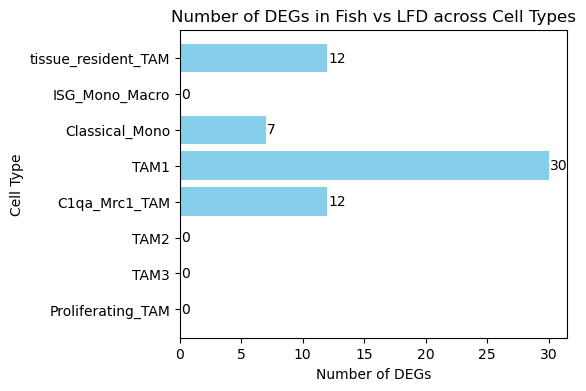

,Cell Type,DEG Count
0,tissue_resident_TAM,12
1,ISG_Mono_Macro,0
2,Classical_Mono,7
3,TAM1,30
4,C1qa_Mrc1_TAM,12
5,TAM2,0
6,TAM3,0
7,Proliferating_TAM,0


In [84]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "Fish", cond2 = "LFD",pval_threshold=0.05, logfc_threshold=0, layers = "prot")

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4
Skipping cluster TAM4 for comparison Fish vs Soy due to error: Could not calculate statistics for groups Fish since they only contain one sample.


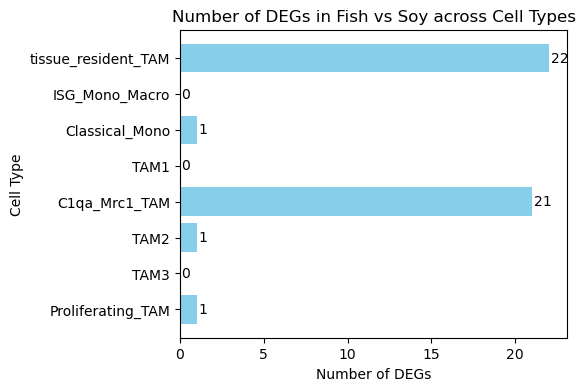

,Cell Type,DEG Count
0,tissue_resident_TAM,22
1,ISG_Mono_Macro,0
2,Classical_Mono,1
3,TAM1,0
4,C1qa_Mrc1_TAM,21
5,TAM2,1
6,TAM3,0
7,Proliferating_TAM,1


In [85]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "Fish", cond2 = "Soy",pval_threshold=0.05, logfc_threshold=0, layers = "prot")

Processing cluster: tissue_resident_TAM
Processing cluster: ISG_Mono_Macro
Processing cluster: Classical_Mono
Processing cluster: TAM1
Processing cluster: C1qa_Mrc1_TAM
Processing cluster: TAM2
Processing cluster: TAM3
Processing cluster: Proliferating_TAM
Processing cluster: TAM4


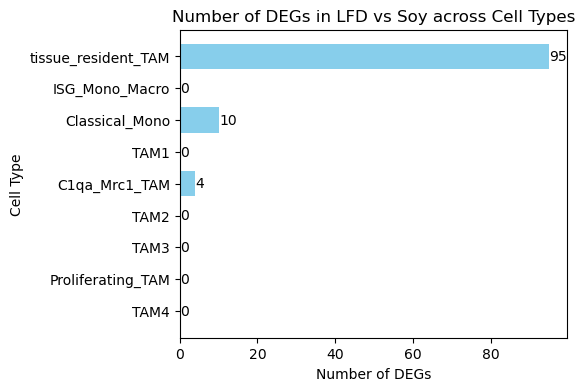

,Cell Type,DEG Count
0,tissue_resident_TAM,95
1,ISG_Mono_Macro,0
2,Classical_Mono,10
3,TAM1,0
4,C1qa_Mrc1_TAM,4
5,TAM2,0
6,TAM3,0
7,Proliferating_TAM,0
8,TAM4,0


In [86]:
compare_deg_counts(prot, cluster_key = "TAMcelltype_V2", condition_key = "condition", cond1 = "LFD", cond2 = "Soy",pval_threshold=0.05, logfc_threshold=0, layers = "prot")